In [1]:
!pwd

/Users/nirmithah/Desktop


In [2]:
import pandas as pd

dashboard = pd.read_excel('dashboard_data.xlsx', sheet_name="Spending & Utilization YTD 2023")
print("Initial shape:", dashboard.shape)
print("\nFirst 10 column names:\n", dashboard.columns.tolist()[:10])
dashboard.head(5)


Initial shape: (3601, 45)

First 10 column names:
 ['Medicare Part D Drug Spending and Utilization, Calendar Years 2019 - 2023', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9']


,"Medicare Part D Drug Spending and Utilization, Calendar Years 2019 - 2023",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,*Average spending per dosage unit reflects mul...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Calendar Year 2019,NaN,NaN,NaN,NaN,NaN,NaN,...,Calendar Year 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yearly Change,NaN
2,Brand Name,Generic Name,Number of Manufacturers,Total Spending,Total Dosage Units,Total Claims,Total \nBeneficiaries,Average Spending Per Dosage Unit (Weighted),Average \nSpending Per Claim,Average \nSpending Per Beneficiary,...,Total Spending,Total Dosage Units,Total Claims,Total \nBeneficiaries,Average Spending Per Dosage Unit (Weighted),Average \nSpending Per Claim,Average \nSpending Per Beneficiary,Outlier \nFlag,Change in Average Spending Per Dosage Unit (20...,Annual Growth Rate in Average Spending Per Dos...
3,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,139201.68,642471,5392,1878,0.216788,25.816335,74.1223,...,44355.04,195672,1613,699,0.227162,27.498475,63.454993,0,0.005702,0.011754
4,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,343031.42,1830596,14581,5319,0.187389,23.525919,64.491713,...,97951.18,406617,3269,1267,0.240932,29.963652,77.309534,0,0.022165,0.064848


In [3]:
dashboard = dashboard.iloc[2:].reset_index(drop=True)

dashboard.columns = dashboard.iloc[0]
dashboard = dashboard.iloc[1:].reset_index(drop=True)

print("After resetting headers:")
print("Shape:", dashboard.shape)
print("Sample columns:", dashboard.columns.tolist()[:15])
dashboard.head(3)


After resetting headers:
Shape: (3598, 45)
Sample columns: ['Brand Name', 'Generic Name', 'Number of Manufacturers', 'Total Spending', 'Total Dosage Units', 'Total Claims', 'Total \nBeneficiaries', 'Average Spending Per Dosage Unit (Weighted)', 'Average \nSpending Per Claim', 'Average \nSpending Per Beneficiary', 'Outlier \nFlag', 'Total Spending', 'Total Dosage Units', 'Total Claims', 'Total \nBeneficiaries']


,Brand Name,Generic Name,Number of Manufacturers,Total Spending,Total Dosage Units,Total Claims,Total \nBeneficiaries,Average Spending Per Dosage Unit (Weighted),Average \nSpending Per Claim,Average \nSpending Per Beneficiary,...,Total Spending,Total Dosage Units,Total Claims,Total \nBeneficiaries,Average Spending Per Dosage Unit (Weighted),Average \nSpending Per Claim,Average \nSpending Per Beneficiary,Outlier \nFlag,Change in Average Spending Per Dosage Unit (2022-2023),Annual Growth Rate in Average Spending Per Dosage Unit (2019-2023)
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,139201.68,642471,5392,1878,0.216788,25.816335,74.1223,...,44355.04,195672,1613,699,0.227162,27.498475,63.454993,0,0.005702,0.011754
1,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,343031.42,1830596,14581,5319,0.187389,23.525919,64.491713,...,97951.18,406617,3269,1267,0.240932,29.963652,77.309534,0,0.022165,0.064848
2,Abacavir,Abacavir Sulfate,5,10110328.45,3316293,42629,6085,3.482725,237.1702,1661.51659,...,5287295.41,1648593,19632,2809,3.594357,269.320263,1882.269637,0,-0.071481,0.007919


In [4]:
dashboard = dashboard.dropna(axis=1, how='all')

dashboard.columns = (
    dashboard.columns.astype(str)
    .str.replace(r"\n", " ", regex=True)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
)

print("Cleaned column names (first 20):\n", dashboard.columns.tolist()[:20])


Cleaned column names (first 20):
 ['Brand Name', 'Generic Name', 'Number of Manufacturers', 'Total Spending', 'Total Dosage Units', 'Total Claims', 'Total Beneficiaries', 'Average Spending Per Dosage Unit (Weighted)', 'Average Spending Per Claim', 'Average Spending Per Beneficiary', 'Outlier Flag', 'Total Spending', 'Total Dosage Units', 'Total Claims', 'Total Beneficiaries', 'Average Spending Per Dosage Unit (Weighted)', 'Average Spending Per Claim', 'Average Spending Per Beneficiary', 'Outlier Flag', 'Total Spending']


In [5]:
block_starts = [i for i, c in enumerate(dashboard.columns) if c == 'Total Spending']
print("Found Total Spending columns at indices:", block_starts)
print("Total blocks detected:", len(block_starts))

Found Total Spending columns at indices: [3, 11, 19, 27, 35]
Total blocks detected: 5


In [6]:
base_cols = ['Brand Name', 'Generic Name', 'Number of Manufacturers']

block_starts = [i for i, c in enumerate(dashboard.columns) if c == 'Total Spending']
last_block_start = block_starts[-1]

end = len(dashboard.columns)
cols_2023 = base_cols + dashboard.columns[last_block_start:end].tolist()


dashboard_2023 = dashboard[cols_2023].copy()

dashboard_2023.columns = (
    dashboard_2023.columns.astype(str)
    .str.replace(r"\n", " ", regex=True)
    .str.strip()
    .str.replace(" ", "_")
)

dashboard_2023 = dashboard_2023.loc[:, ~dashboard_2023.columns.duplicated()]

print("\nAfter dropping duplicates:\n", dashboard_2023.columns.tolist())
dashboard_2023.head(3)



After dropping duplicates:
 ['Brand_Name', 'Generic_Name', 'Number_of_Manufacturers', 'Total_Spending', 'Total_Dosage_Units', 'Total_Claims', 'Total_Beneficiaries', 'Average_Spending_Per_Dosage_Unit_(Weighted)', 'Average_Spending_Per_Claim', 'Average_Spending_Per_Beneficiary', 'Outlier_Flag', 'Change_in_Average_Spending_Per_Dosage_Unit_(2022-2023)', 'Annual_Growth_Rate_in_Average_Spending_Per_Dosage_Unit_(2019-2023)']


,Brand_Name,Generic_Name,Number_of_Manufacturers,Total_Spending,Total_Dosage_Units,Total_Claims,Total_Beneficiaries,Average_Spending_Per_Dosage_Unit_(Weighted),Average_Spending_Per_Claim,Average_Spending_Per_Beneficiary,Outlier_Flag,Change_in_Average_Spending_Per_Dosage_Unit_(2022-2023),Annual_Growth_Rate_in_Average_Spending_Per_Dosage_Unit_(2019-2023)
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,139201.68,642471,5392,1878,0.216788,25.816335,74.1223,0,0.005702,0.011754
1,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,343031.42,1830596,14581,5319,0.187389,23.525919,64.491713,0,0.022165,0.064848
2,Abacavir,Abacavir Sulfate,5,10110328.45,3316293,42629,6085,3.482725,237.1702,1661.51659,0,-0.071481,0.007919


In [7]:
dashboard_2023 = dashboard_2023.rename(columns={
    'Brand_Name': 'Brand_Name',
    'Generic_Name': 'Generic_Name',
    'Number_of_Manufacturers': 'Num_Manufacturers',
    'Average_Spending_Per_Claim': 'Avg_Spending_per_Claim',
    'Total_Spending': 'Total_Spending',
    'Total_Claims': 'Total_Claims'
})

dashboard_2023['Generic_Name'] = (
    dashboard_2023['Generic_Name']
    .astype(str)
    .str.strip()
    .str.upper()
)


In [8]:

medicare_partd = pd.read_csv("MUP_DPR_RY25_P04_V10_DY23_Geo.csv", low_memory = False)

medicare_partd.columns = (
    medicare_partd.columns.astype(str)
    .str.replace("\n", " ", regex=True)
    .str.strip()
    .str.replace(r"\s+", "_", regex=True)
)

medicare_partd['Gnrc_Name'] = (
    medicare_partd['Gnrc_Name']
    .astype(str)
    .str.strip()
    .str.upper()
)

print("Medicare Part D shape:", medicare_partd.shape)
print("Columns:", medicare_partd.columns[:10].tolist())


Medicare Part D shape: (115936, 22)
Columns: ['Prscrbr_Geo_Lvl', 'Prscrbr_Geo_Cd', 'Prscrbr_Geo_Desc', 'Brnd_Name', 'Gnrc_Name', 'Tot_Prscrbrs', 'Tot_Clms', 'Tot_30day_Fills', 'Tot_Drug_Cst', 'Tot_Benes']


In [9]:
merge1 = medicare_partd.merge(
    dashboard_2023[['Generic_Name','Num_Manufacturers','Avg_Spending_per_Claim','Total_Spending','Total_Claims']],
    left_on='Gnrc_Name',
    right_on='Generic_Name',
    how='left'
)


In [10]:

matched = merge1['Num_Manufacturers'].notna().sum()
total = len(merge1)
print(f"\nDashboard matches: {matched:,} / {total:,} ({matched/total:.1%})")

unmatched = merge1[merge1['Num_Manufacturers'].isna()]
print("\nExample of drugs NOT matched (first 10):")
print(unmatched[['Gnrc_Name','Brnd_Name']].head(10))

dupes = merge1['Gnrc_Name'].duplicated().sum()
print(f"\nDuplicate generic names in merged data: {dupes}")

print("\nNumeric column summary:")
print(merge1[['Tot_Clms','Tot_Drug_Cst','Tot_Benes','Total_Claims','Total_Spending']].describe().round(2))

print("\nPercent of missing values per column:")
print((merge1.isna().mean().round(2)*100).sort_values(ascending=False).head(10))



Dashboard matches: 562,764 / 562,773 (100.0%)

Example of drugs NOT matched (first 10):
                         Gnrc_Name                  Brnd_Name
1852             BLEOMYCIN SULFATE          Bleomycin Sulfate
5579            ETHACRYNATE SODIUM         Ethacrynate Sodium
6038              FOSCARNET SODIUM           Foscarnet Sodium
6285    GLYCOPYRROLATE IN WATER/PF             Glycopyrrolate
7019                    IFOSFAMIDE                 Ifosfamide
11844        PHYTONADIONE (VIT K1)               Phytonadione
13382    SILVER NITRATE APPLICATOR  Silver Nitrate Applicator
254065       PHYTONADIONE (VIT K1)               Phytonadione
416233          ETHACRYNATE SODIUM         Ethacrynate Sodium

Duplicate generic names in merged data: 560828

Numeric column summary:
          Tot_Clms  Tot_Drug_Cst    Tot_Benes
count    562773.00  5.627730e+05    463077.00
mean      19838.87  2.465205e+06      7213.43
std      392973.85  5.201319e+07    113988.97
min          11.00  1.506000e+01  

In [11]:
mlr_numeric_check = merge1[['Tot_Clms','Tot_Drug_Cst','Tot_Benes',
                            'Num_Manufacturers','Avg_Spending_per_Claim',
                            'Total_Spending','Total_Claims']]

print(mlr_numeric_check.dtypes)


Tot_Clms                    int64
Tot_Drug_Cst              float64
Tot_Benes                 float64
Num_Manufacturers          object
Avg_Spending_per_Claim     object
Total_Spending             object
Total_Claims               object
dtype: object


In [12]:
import numpy as np

cols_to_clean = ['Num_Manufacturers','Avg_Spending_per_Claim','Total_Spending','Total_Claims']

for col in cols_to_clean:
    merge1[col] = (
        merge1[col]
        .astype(str)
        .str.strip()                         # remove leading/trailing spaces
        .replace('', np.nan)                 # blank strings → NaN
        .replace('nan', np.nan)              # string "nan" → NaN
        .str.replace('[\$,]', '', regex=True) # remove $ and commas
        .astype(float)                       # finally convert to float
    )

print(merge1[cols_to_clean].dtypes)
print("\nSample cleaned values:\n", merge1[cols_to_clean].head())


<>:13: SyntaxWarning: invalid escape sequence '\$'
<>:13: SyntaxWarning: invalid escape sequence '\$'
/var/folders/_k/y1_p48j14513f0lwggq1p1wh0000gn/T/ipykernel_14338/2009452821.py:13: SyntaxWarning: invalid escape sequence '\$'
  .str.replace('[\$,]', '', regex=True) # remove $ and commas


Num_Manufacturers         float64
Avg_Spending_per_Claim    float64
Total_Spending            float64
Total_Claims              float64
dtype: object

Sample cleaned values:
    Num_Manufacturers  Avg_Spending_per_Claim  Total_Spending  Total_Claims
0                1.0               25.816335       139201.68        5392.0
1                1.0               23.525919       343031.42       14581.0
2                1.0               87.451781       176740.05        2021.0
3                1.0               63.487151      1659681.10       26142.0
4                1.0               44.570355       120651.95        2707.0


In [13]:
mlr_druglevel = merge1.groupby('Gnrc_Name', as_index=False).agg({
    'Tot_Clms': 'sum',
    'Tot_Drug_Cst': 'sum',
    'Tot_Benes': 'sum',
    'Num_Manufacturers': 'max',
    'Avg_Spending_per_Claim': 'mean',
    'Total_Spending': 'sum',
    'Total_Claims': 'sum'
})


In [14]:
print("Unique drugs after aggregation:", len(mlr_druglevel))
mlr_druglevel.head()

Unique drugs after aggregation: 1945


,Gnrc_Name,Tot_Clms,Tot_Drug_Cst,Tot_Benes,Num_Manufacturers,Avg_Spending_per_Claim,Total_Spending,Total_Claims
0,0.9 % SODIUM CHLORIDE,607402,15137157.91,219930.0,7.0,23.936907,2.955434e+08,12346768.0
1,AA 5 %/CALCIUM/LYTES/DEXT 20 %,35,4628.00,0.0,1.0,370.834590,1.357255e+05,366.0
2,AA 5%/D15W/ELECTROLYTES,48,20358.50,0.0,1.0,421.565116,1.450184e+05,344.0
3,ABACAVIR SULFATE,79112,21525698.18,11454.0,5.0,395.119144,5.815714e+08,2415056.0
4,ABACAVIR SULFATE/LAMIVUDINE,82388,42383834.88,11858.0,4.0,867.357794,9.574441e+08,2191614.0


In [15]:
products = pd.read_csv("products.txt", sep="~", dtype=str)
patent = pd.read_csv("patent.txt", sep="~", dtype=str)
exclusivity = pd.read_csv("exclusivity.txt", sep="~", dtype=str)



In [16]:

import numpy as np

products['Ingredient'] = products['Ingredient'].astype(str).str.strip().str.upper()
products = products[['Ingredient','Appl_No','Product_No','Approval_Date']]

patent['Patent_Expire_Date_Text'] = pd.to_datetime(patent['Patent_Expire_Date_Text'], errors='coerce')
patent = patent[['Appl_No','Product_No','Patent_Expire_Date_Text']]

exclusivity['Exclusivity_Date'] = pd.to_datetime(exclusivity['Exclusivity_Date'], errors='coerce')
exclusivity = exclusivity[['Appl_No','Product_No','Exclusivity_Date']]

loe = (
    patent.merge(exclusivity, on=['Appl_No','Product_No'], how='outer')
          .assign(LOE_Date=lambda d: d[['Patent_Expire_Date_Text','Exclusivity_Date']].min(axis=1))
          [['Appl_No','Product_No','LOE_Date']]
)

print("LOE data sample:\n", loe.head(10))


LOE data sample:
   Appl_No Product_No   LOE_Date
0  008372        003 2041-07-18
1  008372        003 2041-07-18
2  008372        003 2041-07-18
3  008372        004 2041-07-18
4  008372        004 2041-07-18
5  008372        004 2041-07-18
6  008372        008 2041-07-18
7  008372        008 2041-07-18
8  008372        008 2041-07-18
9  008975        001 2043-10-27


In [17]:
loe_unique = (
    loe.groupby(['Appl_No','Product_No'], as_index=False)
       .agg({'LOE_Date':'min'})
)

print("Unique LOE records:", len(loe_unique))
print(loe_unique.head())


Unique LOE records: 2716
  Appl_No Product_No   LOE_Date
0  008372        003 2041-07-18
1  008372        004 2041-07-18
2  008372        008 2041-07-18
3  008975        001 2043-10-27
4  008975        002 2043-10-27


In [18]:
mlr_orange = mlr_druglevel.merge(
    products[['Ingredient','Appl_No','Product_No']],
    left_on='Gnrc_Name',
    right_on='Ingredient',
    how='left'
).merge(
    loe_unique, on=['Appl_No','Product_No'], how='left'
)

print("Rows after merging Orange Book:", len(mlr_orange))
print("Example merged columns:\n", mlr_orange[['Gnrc_Name','LOE_Date']].head(10))


Rows after merging Orange Book: 26788
Example merged columns:
                         Gnrc_Name LOE_Date
0           0.9 % SODIUM CHLORIDE      NaT
1  AA 5 %/CALCIUM/LYTES/DEXT 20 %      NaT
2         AA 5%/D15W/ELECTROLYTES      NaT
3                ABACAVIR SULFATE      NaT
4                ABACAVIR SULFATE      NaT
5                ABACAVIR SULFATE      NaT
6                ABACAVIR SULFATE      NaT
7                ABACAVIR SULFATE      NaT
8                ABACAVIR SULFATE      NaT
9                ABACAVIR SULFATE      NaT


In [19]:
mlr_orange_clean = (
    mlr_orange.groupby('Gnrc_Name', as_index=False)
              .agg({'LOE_Date':'min'})
)

print("Unique drugs with LOE info:", mlr_orange_clean['LOE_Date'].notna().sum())
print("Missing LOE dates:", mlr_orange_clean['LOE_Date'].isna().sum())
print(mlr_orange_clean.head(10))


Unique drugs with LOE info: 509
Missing LOE dates: 1436
                        Gnrc_Name   LOE_Date
0           0.9 % SODIUM CHLORIDE        NaT
1  AA 5 %/CALCIUM/LYTES/DEXT 20 %        NaT
2         AA 5%/D15W/ELECTROLYTES        NaT
3                ABACAVIR SULFATE        NaT
4     ABACAVIR SULFATE/LAMIVUDINE        NaT
5  ABACAVIR/DOLUTEGRAVIR/LAMIVUDI        NaT
6  ABACAVIR/LAMIVUDINE/ZIDOVUDINE        NaT
7                   ABALOPARATIDE 2025-12-19
8                       ABATACEPT        NaT
9               ABATACEPT/MALTOSE        NaT


In [20]:
mlr_final = mlr_druglevel.merge(mlr_orange_clean, on='Gnrc_Name', how='left')

mlr_final['LOE_Year'] = mlr_final['LOE_Date'].dt.year
mlr_final['Year'] = 2023

mlr_final['Post_LOE'] = np.where(
    mlr_final['LOE_Year'].isna(), 1, 
    (mlr_final['Year'] >= mlr_final['LOE_Year']).astype(int)
)

mlr_final['AvgOOP_perClaim'] = (
    mlr_final['Tot_Drug_Cst'] / mlr_final['Tot_Clms']
) * 0.2

print("Final dataset shape:", mlr_final.shape)
print(mlr_final[['Gnrc_Name','LOE_Year','Post_LOE','AvgOOP_perClaim']].head(10))


Final dataset shape: (1945, 13)
                        Gnrc_Name  LOE_Year  Post_LOE  AvgOOP_perClaim
0           0.9 % SODIUM CHLORIDE       NaN         1         4.984231
1  AA 5 %/CALCIUM/LYTES/DEXT 20 %       NaN         1        26.445714
2         AA 5%/D15W/ELECTROLYTES       NaN         1        84.827083
3                ABACAVIR SULFATE       NaN         1        54.418288
4     ABACAVIR SULFATE/LAMIVUDINE       NaN         1       102.888369
5  ABACAVIR/DOLUTEGRAVIR/LAMIVUDI       NaN         1       785.336302
6  ABACAVIR/LAMIVUDINE/ZIDOVUDINE       NaN         1       347.075304
7                   ABALOPARATIDE    2025.0         0       571.548252
8                       ABATACEPT       NaN         1      1210.650165
9               ABATACEPT/MALTOSE       NaN         1       915.494260


In [21]:
print("Drugs with LOE info:", mlr_final['LOE_Year'].notna().sum())
print("Percent missing LOE info:", mlr_final['LOE_Year'].isna().mean().round(2)*100, "%")

print("\nOOP Cost Summary:")
print(mlr_final['AvgOOP_perClaim'].describe().round(2))

print("\nPost_LOE breakdown:")
print(mlr_final['Post_LOE'].value_counts())


Drugs with LOE info: 509
Percent missing LOE info: 74.0 %

OOP Cost Summary:
count     1945.00
mean      1118.61
std       3460.96
min          0.63
25%         13.20
50%         76.79
75%        591.63
max      71847.54
Name: AvgOOP_perClaim, dtype: float64

Post_LOE breakdown:
Post_LOE
1    1441
0     504
Name: count, dtype: int64


In [22]:

plot_df = mlr_final[['Num_Manufacturers', 'AvgOOP_perClaim', 'Post_LOE']].copy()

plot_df = plot_df.dropna(subset=['Num_Manufacturers', 'AvgOOP_perClaim', 'Post_LOE'])
plot_df = plot_df[plot_df['AvgOOP_perClaim'] > 0]

plot_df['log_OOP'] = np.log10(plot_df['AvgOOP_perClaim'])

print(plot_df.columns.tolist())


['Num_Manufacturers', 'AvgOOP_perClaim', 'Post_LOE', 'log_OOP']


/var/folders/_k/y1_p48j14513f0lwggq1p1wh0000gn/T/ipykernel_14338/1829438087.py:17: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from current font.
  plt.tight_layout()
/var/folders/_k/y1_p48j14513f0lwggq1p1wh0000gn/T/ipykernel_14338/1829438087.py:17: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from current font.
  plt.tight_layout()
/Users/nirmithah/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nirmithah/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


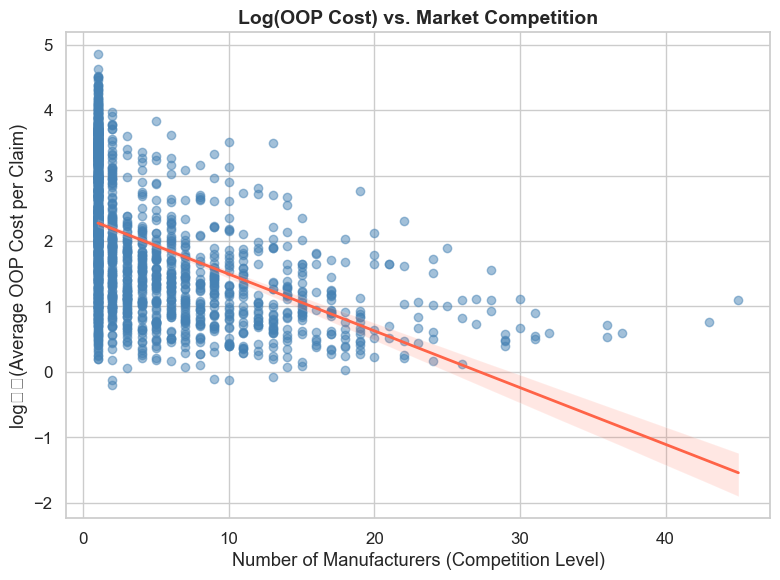

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)

plt.figure(figsize=(8,6))
sns.regplot(
    x='Num_Manufacturers',
    y='log_OOP',
    data=plot_df,
    scatter_kws={'alpha':0.5, 'color':'#4682B4'},
    line_kws={'color':'#FF6347', 'lw':2}
)
plt.title("Log(OOP Cost) vs. Market Competition", fontsize=14, weight='bold')
plt.xlabel("Number of Manufacturers (Competition Level)")
plt.ylabel("log₁₀(Average OOP Cost per Claim)")
plt.tight_layout()
plt.show()


/var/folders/_k/y1_p48j14513f0lwggq1p1wh0000gn/T/ipykernel_14338/177068872.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/_k/y1_p48j14513f0lwggq1p1wh0000gn/T/ipykernel_14338/177068872.py:13: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from current font.
  plt.tight_layout()
/var/folders/_k/y1_p48j14513f0lwggq1p1wh0000gn/T/ipykernel_14338/177068872.py:13: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from current font.
  plt.tight_layout()
/var/folders/_k/y1_p48j14513f0lwggq1p1wh0000gn/T/ipykernel_14338/177068872.py:14: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from current font.
  plt.savefig("box.png", dpi=300, bbox_inches='tight')
/var/folders/_k/y1_p48j14513f0lwggq1p1wh0000gn/T/ipykernel_14338/177068872.py:14: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from current font.
  plt.save

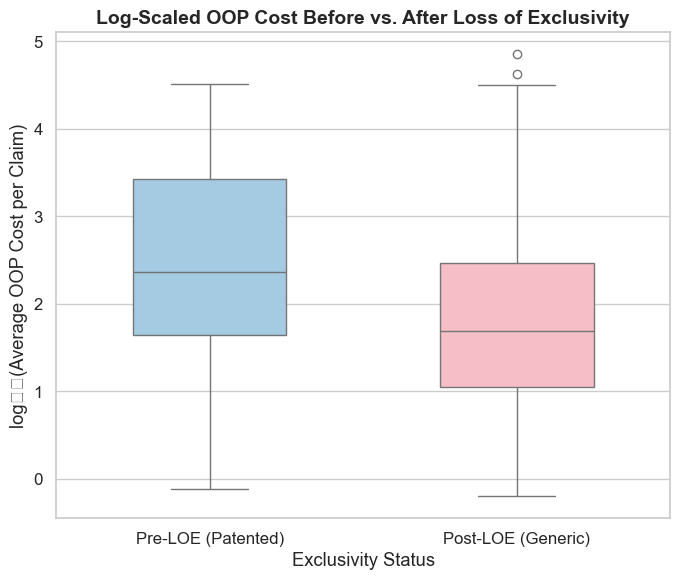

In [24]:
plt.figure(figsize=(7,6))
sns.boxplot(
    x='Post_LOE',
    y='log_OOP',
    data=plot_df,
    palette=['#9ACEEB','#FFB6C1'],
    width=0.5
)
plt.xticks([0,1], ['Pre-LOE (Patented)', 'Post-LOE (Generic)'])
plt.title("Log-Scaled OOP Cost Before vs. After Loss of Exclusivity", fontsize=14, weight='bold')
plt.xlabel("Exclusivity Status")
plt.ylabel("log₁₀(Average OOP Cost per Claim)")
plt.tight_layout()
plt.savefig("box.png", dpi=300, bbox_inches='tight')
plt.show()


/var/folders/_k/y1_p48j14513f0lwggq1p1wh0000gn/T/ipykernel_14338/226677026.py:26: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from current font.
  plt.tight_layout()
/var/folders/_k/y1_p48j14513f0lwggq1p1wh0000gn/T/ipykernel_14338/226677026.py:26: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from current font.
  plt.tight_layout()
/var/folders/_k/y1_p48j14513f0lwggq1p1wh0000gn/T/ipykernel_14338/226677026.py:27: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from current font.
  plt.savefig("log.png", dpi=300, bbox_inches='tight')
/var/folders/_k/y1_p48j14513f0lwggq1p1wh0000gn/T/ipykernel_14338/226677026.py:27: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from current font.
  plt.savefig("log.png", dpi=300, bbox_inches='tight')
/Users/nirmithah/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nirmithah/anaconda3/lib/py

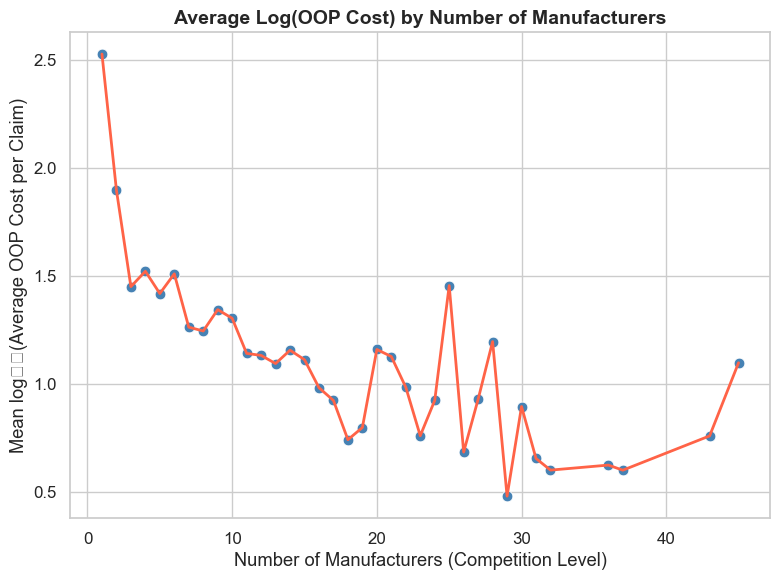

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plot_df = mlr_final[['Num_Manufacturers', 'AvgOOP_perClaim']].copy()
plot_df = plot_df.dropna(subset=['Num_Manufacturers','AvgOOP_perClaim'])
plot_df = plot_df[plot_df['AvgOOP_perClaim'] > 0]

# Log-transform both variables
plot_df['log_manuf'] = np.log10(plot_df['Num_Manufacturers'] + 1)  # +1 to handle zeros
plot_df['log_OOP'] = np.log10(plot_df['AvgOOP_perClaim'])

bin_df = (
    plot_df.groupby('Num_Manufacturers', as_index=False)
    .agg({'log_OOP':'mean'})
)

sns.set(style="whitegrid", font_scale=1.1)

plt.figure(figsize=(8,6))
sns.lineplot(x='Num_Manufacturers', y='log_OOP', data=bin_df, color='#FF6347', lw=2)
sns.scatterplot(x='Num_Manufacturers', y='log_OOP', data=bin_df, color='#4682B4', s=60)
plt.title("Average Log(OOP Cost) by Number of Manufacturers", fontsize=14, weight='bold')
plt.xlabel("Number of Manufacturers (Competition Level)")
plt.ylabel("Mean log₁₀(Average OOP Cost per Claim)")
plt.tight_layout()
plt.savefig("log.png", dpi=300, bbox_inches='tight')

plt.show()


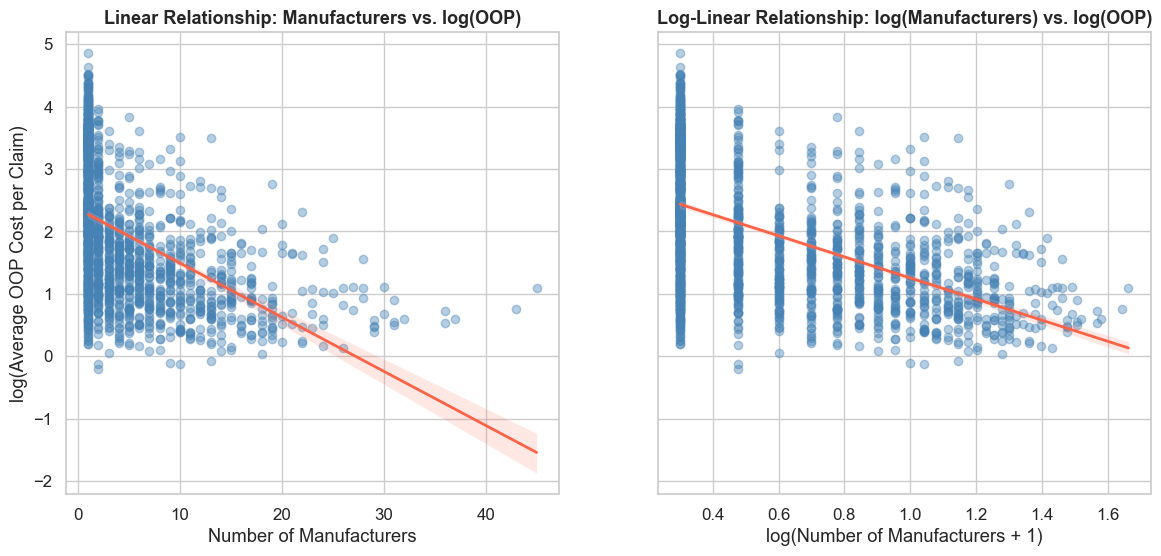

In [26]:

plot_df['log_manuf'] = np.log10(plot_df['Num_Manufacturers'] + 1)  # +1 avoids log(0)


fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# (A) Raw manufacturers
sns.regplot(
    x='Num_Manufacturers',
    y='log_OOP',
    data=plot_df,
    ax=axes[0],
    scatter_kws={'alpha':0.4, 'color':'#4682B4'},
    line_kws={'color':'#FF6347', 'lw':2}
)
axes[0].set_title("Linear Relationship: Manufacturers vs. log(OOP)", fontsize=13, weight='bold')
axes[0].set_xlabel("Number of Manufacturers")
axes[0].set_ylabel("log(Average OOP Cost per Claim)")

# (B) Log-transformed manufacturers
sns.regplot(
    x='log_manuf',
    y='log_OOP',
    data=plot_df,
    ax=axes[1],
    scatter_kws={'alpha':0.4, 'color':'#4682B4'},
    line_kws={'color':'#FF6347', 'lw':2}
)
axes[1].set_title("Log-Linear Relationship: log(Manufacturers) vs. log(OOP)", fontsize=13, weight='bold')
axes[1].set_xlabel("log(Number of Manufacturers + 1)")
axes[1].set_ylabel("")

plt.savefig("linearvslog.png", dpi=300, bbox_inches='tight')

plt.show()


In [27]:
from sklearn.linear_model import LinearRegression

X_raw = plot_df[['Num_Manufacturers']]
y = plot_df['log_OOP']
raw_model = LinearRegression().fit(X_raw, y)
r2_raw = raw_model.score(X_raw, y)

X_log = plot_df[['log_manuf']]
log_model = LinearRegression().fit(X_log, y)
r2_log = log_model.score(X_log, y)

print(f"R² (Raw Manufacturers): {r2_raw:.3f}")
print(f"R² (Log Manufacturers): {r2_log:.3f}")
print(f"ΔR² improvement: {r2_log - r2_raw:.3f}")


R² (Raw Manufacturers): 0.226
R² (Log Manufacturers): 0.311
ΔR² improvement: 0.085


In [28]:
corr = plot_df[['log_OOP','log_manuf']].corr().iloc[0,1]
print(f"Correlation between log(OOP) and log(manufacturers): {corr:.2f}")


Correlation between log(OOP) and log(manufacturers): -0.56


In [29]:
import numpy as np
import pandas as pd

mlr_df = mlr_final[['AvgOOP_perClaim', 'Num_Manufacturers', 'Post_LOE', 'Tot_Clms', 'Tot_Benes']].dropna()

mlr_df['log_OOP'] = np.log(mlr_df['AvgOOP_perClaim'] + 1)
mlr_df['log_Manufacturers'] = np.log(mlr_df['Num_Manufacturers'] + 1)
mlr_df['log_Claims'] = np.log(mlr_df['Tot_Clms'] + 1)
mlr_df['log_Beneficiaries'] = np.log(mlr_df['Tot_Benes'] + 1)

print(mlr_df.describe().T)


                    count          mean           std        min          25%  \
AvgOOP_perClaim    1938.0  1.120686e+03  3.466460e+03   0.634543    13.210485   
Num_Manufacturers  1938.0  4.393189e+00  5.684276e+00   1.000000     1.000000   
Post_LOE           1938.0  7.399381e-01  4.387813e-01   0.000000     0.000000   
Tot_Clms           1938.0  5.760982e+06  3.559464e+07  11.000000  1758.000000   
Tot_Benes          1938.0  1.723618e+06  1.051047e+07   0.000000   348.250000   
log_OOP            1938.0  4.619190e+00  2.315911e+00   0.491363     2.653978   
log_Manufacturers  1938.0  1.316123e+00  7.872282e-01   0.693147     0.693147   
log_Claims         1938.0  1.037666e+01  3.935766e+00   2.484907     7.472462   
log_Beneficiaries  1938.0  8.938569e+00  4.220346e+00   0.000000     5.855787   

                            50%            75%           max  
AvgOOP_perClaim       76.820999     599.763349  7.184754e+04  
Num_Manufacturers      1.000000       6.000000  4.500000e+01  


In [30]:
import numpy as np
import pandas as pd

mlr_df = mlr_final[['AvgOOP_perClaim', 'Num_Manufacturers', 'Post_LOE', 'Tot_Clms', 'Tot_Benes']].dropna()

mlr_df['log_OOP'] = np.log(mlr_df['AvgOOP_perClaim'] + 1)
mlr_df['log_Manufacturers'] = np.log(mlr_df['Num_Manufacturers'] + 1)
mlr_df['log_Claims'] = np.log(mlr_df['Tot_Clms'] + 1)
mlr_df['log_Beneficiaries'] = np.log(mlr_df['Tot_Benes'] + 1)

print("Final dataset shape for MLR:", mlr_df.shape)
mlr_df.head()


Final dataset shape for MLR: (1938, 9)


,AvgOOP_perClaim,Num_Manufacturers,Post_LOE,Tot_Clms,Tot_Benes,log_OOP,log_Manufacturers,log_Claims,log_Beneficiaries
0,4.984231,7.0,1,607402,219930.0,1.789128,2.079442,13.316948,12.301069
1,26.445714,1.0,1,35,0.0,3.312210,0.693147,3.583519,0.000000
2,84.827083,1.0,1,48,0.0,4.452335,0.693147,3.891820,0.000000
3,54.418288,5.0,1,79112,11454.0,4.014910,1.791759,11.278632,9.346182
4,102.888369,4.0,1,82388,11858.0,4.643317,1.609438,11.319207,9.380842


In [31]:
import statsmodels.api as sm

X = mlr_df[['log_Manufacturers', 'Post_LOE', 'log_Claims', 'log_Beneficiaries']]
y = mlr_df['log_OOP']

X = sm.add_constant(X)

mlr_model = sm.OLS(y, X).fit()

print(mlr_model.summary())


                            OLS Regression Results                            
Dep. Variable:                log_OOP   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     435.1
Date:                Sun, 09 Nov 2025   Prob (F-statistic):          1.49e-267
Time:                        18:59:42   Log-Likelihood:                -3754.8
No. Observations:                1938   AIC:                             7520.
Df Residuals:                    1933   BIC:                             7547.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.8938      0.16

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_true = y
y_pred = mlr_model.fittedvalues

# Metrics
r2_mlr = mlr_model.rsquared
rmse_mlr = np.sqrt(mean_squared_error(y_true, y_pred))
mae_mlr = mean_absolute_error(y_true, y_pred)
mape_mlr = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("\n🔹 MLR Evaluation Metrics 🔹")
print(f"R²: {r2_mlr:.3f}")
print(f"RMSE: {rmse_mlr:.3f}")
print(f"MAE: {mae_mlr:.3f}")
print(f"MAPE: {mape_mlr:.2f}%")



🔹 MLR Evaluation Metrics 🔹
R²: 0.474
RMSE: 1.680
MAE: 1.325
MAPE: 40.95%


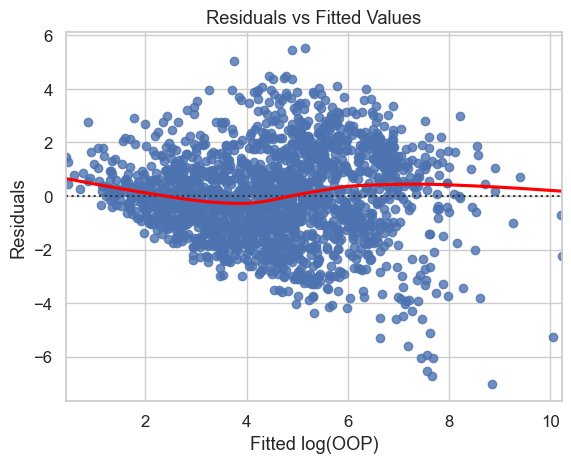

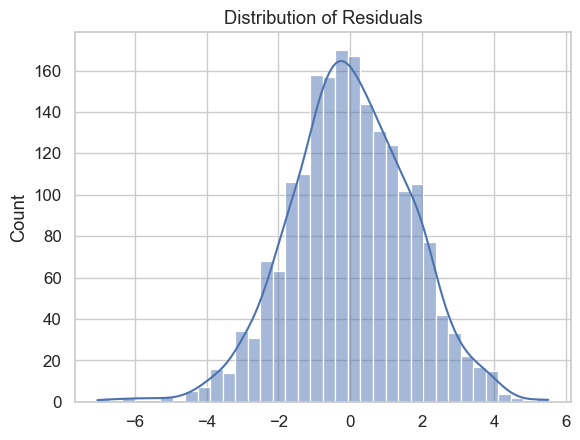


Variance Inflation Factors:
            Variable        VIF
0              const  18.800717
1  log_Manufacturers   1.832401
2           Post_LOE   1.030396
3         log_Claims  26.545570
4  log_Beneficiaries  25.810844


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

residuals = mlr_model.resid

# 1️⃣ Residuals vs Fitted
sns.residplot(x=mlr_model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted log(OOP)")
plt.ylabel("Residuals")
plt.show()

# 2️⃣ Histogram of Residuals
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()

# 3️⃣ VIF (check multicollinearity)
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors:")
print(vif_df)


In [34]:
mlr_metrics = {
    'Model': 'Multiple Linear Regression',
    'R²': r2_mlr,
    'RMSE': rmse_mlr,
    'MAE': mae_mlr,
    'MAPE (%)': mape_mlr
}
mlr_metrics

{'Model': 'Multiple Linear Regression',
 'R²': 0.4737742307217665,
 'RMSE': 1.6795611797379137,
 'MAE': 1.3245146192647876,
 'MAPE (%)': 40.95274335860109}

In [35]:
X = mlr_df[['log_Manufacturers', 'Post_LOE', 'log_Claims']]
X = sm.add_constant(X)
mlr_model_reduced = sm.OLS(y, X).fit()
print(mlr_model_reduced.summary())


                            OLS Regression Results                            
Dep. Variable:                log_OOP   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     424.2
Date:                Sun, 09 Nov 2025   Prob (F-statistic):          1.03e-211
Time:                        18:59:44   Log-Likelihood:                -3887.0
No. Observations:                1938   AIC:                             7782.
Df Residuals:                    1934   BIC:                             7804.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 8.5598      0.14

In [36]:
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_df)

            Variable        VIF
0              const  12.069453
1  log_Manufacturers   1.831109
2           Post_LOE   1.017291
3         log_Claims   1.854290


In [37]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

features = ['Num_Manufacturers', 'Post_LOE', 'Tot_Clms', 'Tot_Benes']
target = 'log_OOP'

X = mlr_df[features]
y = mlr_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.05,
    max_depth=4,
    n_estimators=300,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [38]:
y_pred = xgb_model.predict(X_test)

r2_xgb = r2_score(y_test, y_pred)
rmse_xgb = mean_squared_error(y_test, y_pred, squared=False)
mae_xgb = mean_absolute_error(y_test, y_pred)
mape_xgb = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\n⚡ XGBoost Evaluation Metrics ⚡")
print(f"R²: {r2_xgb:.3f}")
print(f"RMSE: {rmse_xgb:.3f}")
print(f"MAE: {mae_xgb:.3f}")
print(f"MAPE: {mape_xgb:.2f}%")



⚡ XGBoost Evaluation Metrics ⚡
R²: 0.450
RMSE: 1.682
MAE: 1.269
MAPE: 36.12%


/Users/nirmithah/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


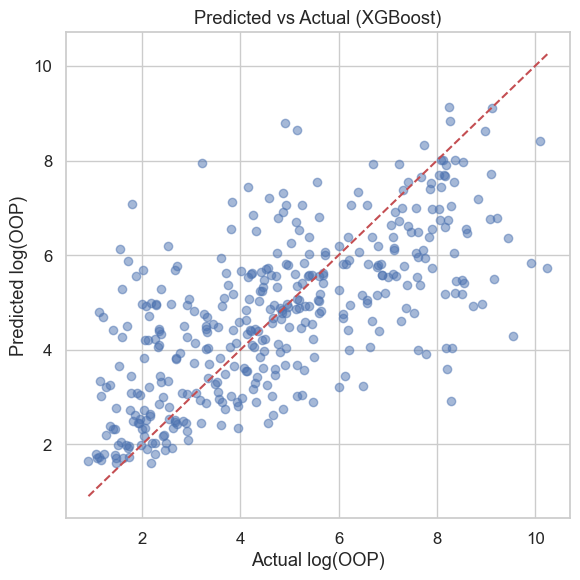

In [39]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual log(OOP)")
plt.ylabel("Predicted log(OOP)")
plt.title("Predicted vs Actual (XGBoost)")
plt.tight_layout()
plt.savefig("predvsactual.png", dpi=300, bbox_inches='tight')
plt.show()


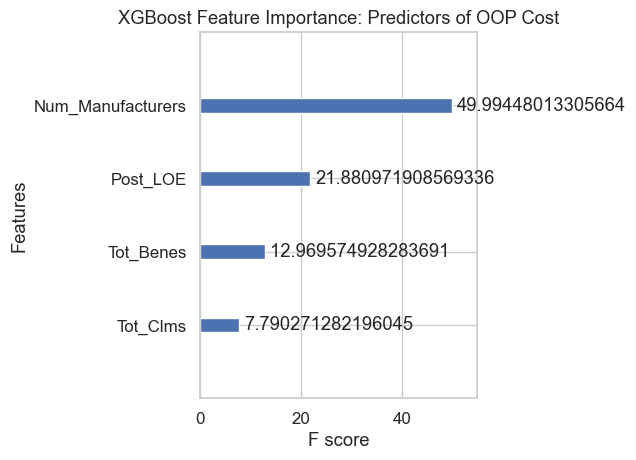

In [40]:
xgb.plot_importance(xgb_model, importance_type='gain')
plt.title("XGBoost Feature Importance: Predictors of OOP Cost")
plt.tight_layout()
plt.savefig("featureimp.png", dpi=300, bbox_inches='tight')

plt.show()


In [41]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


Fitting 3 folds for each of 8 candidates, totalling 24 fits
✅ Best parameters found:
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 250}
Best cross-validated R²: 0.515

⚡ Tuned XGBoost Evaluation ⚡
R²: 0.532
RMSE: 1.576
MAE: 1.179
MAPE: 32.02%


/Users/nirmithah/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


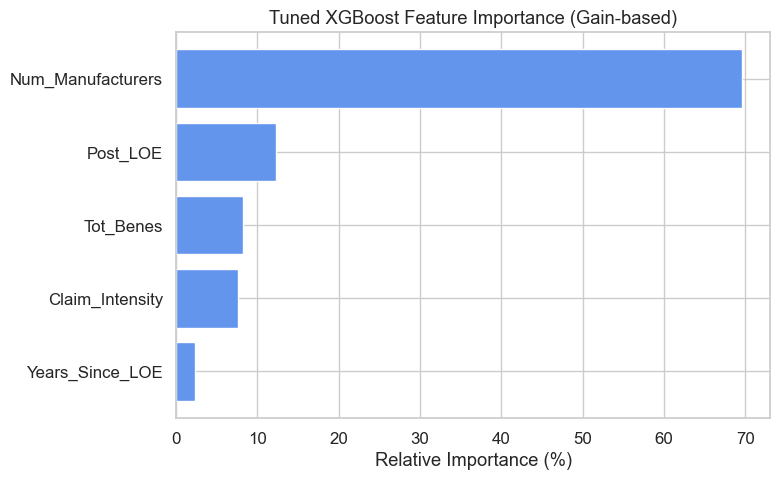

In [43]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

if 'Approval_Date' in mlr_final.columns:
    mlr_final['Years_Since_Approval'] = 2023 - pd.to_datetime(mlr_final['Approval_Date']).dt.year
else:
    mlr_final['Years_Since_Approval'] = np.nan  # fallback if missing

# Years since LOE (generic entry)
mlr_final['Years_Since_LOE'] = 2023 - mlr_final['LOE_Year']

# Claim intensity (claims per beneficiary)
mlr_final['Claim_Intensity'] = mlr_final['Tot_Clms'] / (mlr_final['Tot_Benes'] + 1)

mlr_final[['Years_Since_Approval', 'Years_Since_LOE', 'Claim_Intensity']] = (
    mlr_final[['Years_Since_Approval', 'Years_Since_LOE', 'Claim_Intensity']].fillna(0)
)

mlr_final['log_OOP'] = np.log(mlr_final['AvgOOP_perClaim'] + 1)

features = [
    'Num_Manufacturers', 'Post_LOE', 'Tot_Benes',
    'Years_Since_Approval', 'Years_Since_LOE', 'Claim_Intensity'
]
target = 'log_OOP'

X = mlr_final[features]
y = mlr_final[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



xgb_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    tree_method='hist', 
    n_jobs=-1
)

param_grid = {
    'max_depth': [3, 5],         
    'learning_rate': [0.05, 0.1],  
    'n_estimators': [250, 400],   
}

grid_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=1  
)


grid_search.fit(X_train, y_train)

print("✅ Best parameters found:")
print(grid_search.best_params_)
print(f"Best cross-validated R²: {grid_search.best_score_:.3f}")

best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

r2_tuned = r2_score(y_test, y_pred)
rmse_tuned = mean_squared_error(y_test, y_pred, squared=False)
mae_tuned = mean_absolute_error(y_test, y_pred)
mape_tuned = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\n⚡ Tuned XGBoost Evaluation ⚡")
print(f"R²: {r2_tuned:.3f}")
print(f"RMSE: {rmse_tuned:.3f}")
print(f"MAE: {mae_tuned:.3f}")
print(f"MAPE: {mape_tuned:.2f}%")


importance = best_xgb.get_booster().get_score(importance_type='gain')
importance_df = pd.DataFrame({
    'Feature': importance.keys(),
    'Importance': importance.values()
}).sort_values(by='Importance', ascending=True)

importance_df['Importance'] = 100 * importance_df['Importance'] / importance_df['Importance'].sum()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='cornflowerblue')
plt.xlabel('Relative Importance (%)')
plt.title('Tuned XGBoost Feature Importance (Gain-based)')
plt.tight_layout()
plt.savefig("hyperfeatimp.png", dpi=300, bbox_inches='tight')
plt.show()


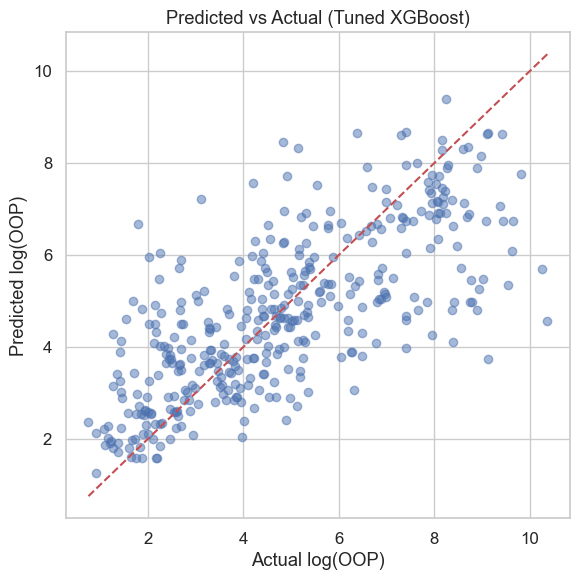

In [44]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual log(OOP)")
plt.ylabel("Predicted log(OOP)")
plt.title("Predicted vs Actual (Tuned XGBoost)")
plt.tight_layout()
plt.savefig("hyppredvsactual.png", dpi=300, bbox_inches='tight')
plt.show()
